In [291]:
source('functions.R')

DATASET_FILENAME = './combined.csv'

MYLIBRARIES<-c("outliers",
               "corrplot",
               "MASS",
               "formattable",
               "stats",
               "caret",
               "PerformanceAnalytics",
               "smotefamily")

install.packages('e1071')
library(caret)
library(e1071)

# ************************************************
# This is where R starts execution

# Automatically release memory
gc()

# Tries to clear plots and other graphics in RStudio output
if(!is.null(dev.list())) dev.off()
graphics.off()

# This clears all warning messages
#assign("last.warning", NULL, envir = baseenv())

# clears the RStudio console area
cat("\014")

# If library not already on your computer this will download and
# install the library. Each library is activated.
library(pacman)
pacman::p_load(char=MYLIBRARIES,install=TRUE,character.only=TRUE)

Warning message in install.packages("e1071"):
“installation of package ‘e1071’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2699357,144.2,7485900,399.8,7485900,399.8
Vcells,9281004,70.9,29445860,224.7,29445857,224.7


png 
  2

In [3]:
#  Load dataset 
dataset<- NreadDataset(DATASET_FILENAME)

[1] "CSV dataset ./combined.csv has been read. Records= 259760"


In [4]:
# display name of a fields in dataset 
names(dataset)
#  display a first 6 row of dataset 
head(dataset)

[1] "X"                              "satisfactionv2"                
 [3] "Gender"                         "CustomerType"                  
 [5] "Age"                            "TypeofTravel"                  
 [7] "Class"                          "FlightDistance"                
 [9] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
[11] "Foodanddrink"                   "Gatelocation"                  
[13] "Inflightwifiservice"            "Inflightentertainment"         
[15] "EaseofOnlinebooking"            "Onboardservice"                
[17] "Legroomservice"                 "Baggagehandling"               
[19] "Checkinservice"                 "Cleanliness"                   
[21] "Onlineboarding"                 "DepartureDelayinMinutes"       
[23] "ArrivalDelayinMinutes"

,X,satisfactionv2,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,⋯,Inflightentertainment,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,⋯,4,3,3,0,3,5,3,2,0,0
2,2,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,⋯,2,3,4,4,4,2,3,2,310,305
3,3,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,⋯,0,2,3,3,4,4,4,2,0,0
4,4,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,⋯,4,1,1,0,1,4,1,3,0,0
5,5,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,⋯,3,2,2,0,2,4,2,5,0,0
6,6,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,⋯,0,2,5,4,5,5,4,2,0,0


In [6]:
# remove unwanted columns 
required_cols<-!names(dataset)%in%c("X")
dataset<- dataset[,required_cols]
names(dataset)

[1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "Age"                           
 [5] "TypeofTravel"                   "Class"                         
 [7] "FlightDistance"                 "Seatcomfort"                   
 [9] "DepartureArrivaltimeconvenient" "Foodanddrink"                  
[11] "Gatelocation"                   "Inflightwifiservice"           
[13] "Inflightentertainment"          "EaseofOnlinebooking"           
[15] "Onboardservice"                 "Legroomservice"                
[17] "Baggagehandling"                "Checkinservice"                
[19] "Cleanliness"                    "Onlineboarding"                
[21] "DepartureDelayinMinutes"        "ArrivalDelayinMinutes"

### Display Summary of dataset
Checking a type of each fields (numeric or symbolic) and also checking for missing value

In [7]:
# displat summary of dataset 
summary(dataset)

 satisfactionv2        Gender          CustomerType            Age       
 Length:259760      Length:259760      Length:259760      Min.   : 7.00  
 Class :character   Class :character   Class :character   1st Qu.:27.00  
 Mode  :character   Mode  :character   Mode  :character   Median :40.00  
                                                          Mean   :39.43  
                                                          3rd Qu.:51.00  
                                                          Max.   :85.00  
 TypeofTravel          Class           FlightDistance  Seatcomfort  
 Length:259760      Length:259760      Min.   :  31   Min.   :0.00  
 Class :character   Class :character   1st Qu.: 606   1st Qu.:2.00  
 Mode  :character   Mode  :character   Median :1510   Median :3.00  
                                       Mean   :1586   Mean   :3.14  
                                       3rd Qu.:2297   3rd Qu.:4.00  
                                       Max.   :6951   Max.   :5.00  

In [10]:
# Visualize a summary with different function
prettydataset<-NPREPROCESSING_prettyDataset(dataset)
prettydataset

HTML widgets cannot be represented in plain text (need html)

In [13]:
# assigning a field type to each fields in Dataset

TYPE_DISCRETE     <- "DISCRETE"           # field is discrete (numeric)
TYPE_ORDINAL      <- "ORDINAL"            # field is continuous numeric
TYPE_SYMBOLIC     <- "SYMBOLIC"           # field is a string
TYPE_NUMERIC      <- "NUMERIC"            # field is initially a numeric
TYPE_IGNORE       <- "IGNORE"             # field is not encoded

# This function will differentiate between Numeric and Symbolic
field_types<-NPREPROCESSING_initialFieldType(dataset)

In [17]:
# Total number of fields
print(paste('Total columns ',ncol(dataset)))
# index of numeric fields
numeric_index<-field_types=="NUMERIC"
# index of symbolic fields
symbolic_index<-field_types=="SYMBOLIC"
# names of colums that are numeric
numeric_fields<-names(dataset[,numeric_index])
# names of colums that are symbolic 
symbolic_fields<-names(dataset[,symbolic_index])
print("**************************************************")
print(paste("Numeric Fields : ", length(numeric_fields)))
print(numeric_fields)
print("**************************************************")
print(paste("Symbolic Fields :", length(symbolic_fields)))
print(symbolic_fields)
print("**************************************************")

# Statisfaction Scale Fields
sat_cols<- c("Inflightwifiservice" ,"DepartureArrivaltimeconvenient",
            "EaseofOnlinebooking","Gatelocation","Foodanddrink",
            "Onlineboarding","Seatcomfort","Inflightentertainment",
            "Onboardservice","Legroomservice","Baggagehandling",
            "Checkinservice","Cleanliness")
print(paste("Satisfy scale Fields : ",length(sat_cols)))

print(sat_cols)
print("**************************************************")
# Other numeric fields that is not satisfaction scale fields
pure_numerical_val<-c('Age', 'FlightDistance', 'DepartureDelayinMinutes','ArrivalDelayinMinutes')
print(paste("others numercial Fields : ",length(pure_numerical_val)))

print(pure_numerical_val)


[1] "Total columns  22"
[1] "**************************************************"
[1] "Numeric Fields :  17"
 [1] "Age"                            "FlightDistance"                
 [3] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
 [5] "Foodanddrink"                   "Gatelocation"                  
 [7] "Inflightwifiservice"            "Inflightentertainment"         
 [9] "EaseofOnlinebooking"            "Onboardservice"                
[11] "Legroomservice"                 "Baggagehandling"               
[13] "Checkinservice"                 "Cleanliness"                   
[15] "Onlineboarding"                 "DepartureDelayinMinutes"       
[17] "ArrivalDelayinMinutes"         
[1] "**************************************************"
[1] "Symbolic Fields : 5"
[1] "satisfactionv2" "Gender"         "CustomerType"   "TypeofTravel"  
[5] "Class"         
[1] "**************************************************"
[1] "Satisfy scale Fields :  13"
 [1] "Inflightwifise

### This summary show that 5 fields in a dataset are symbolic and remaining are numeric

### Symbolic fields are :-

 Satifactionv2 , Gender, Customer , TypeofTravel and Class

### Numeric fields are :-

Age, FlightDistance, Seatcomfort, DepartureArrivaltimeconvenient, Foodanddrink, Gatelocation, Inflightwifiservice, Inflightentertainment, EaseofOnlinebooking, Onboardservice, Legroomservice, Baggagehandling, Checkinservice, Cleanliness, Onlineboarding, DepartureDelayinMinutes,  and ArrivalDelayinMinutes

Where 13 numeric fields are the columns containing satifaction level provided from a customer from a scaling 0 to 5  and other 4 numeric field are age of customer , travel distance of a flight and last two fields are time delay in minute

# Visualizing Numeric fields

## Visualizing a correlation of numeric fields

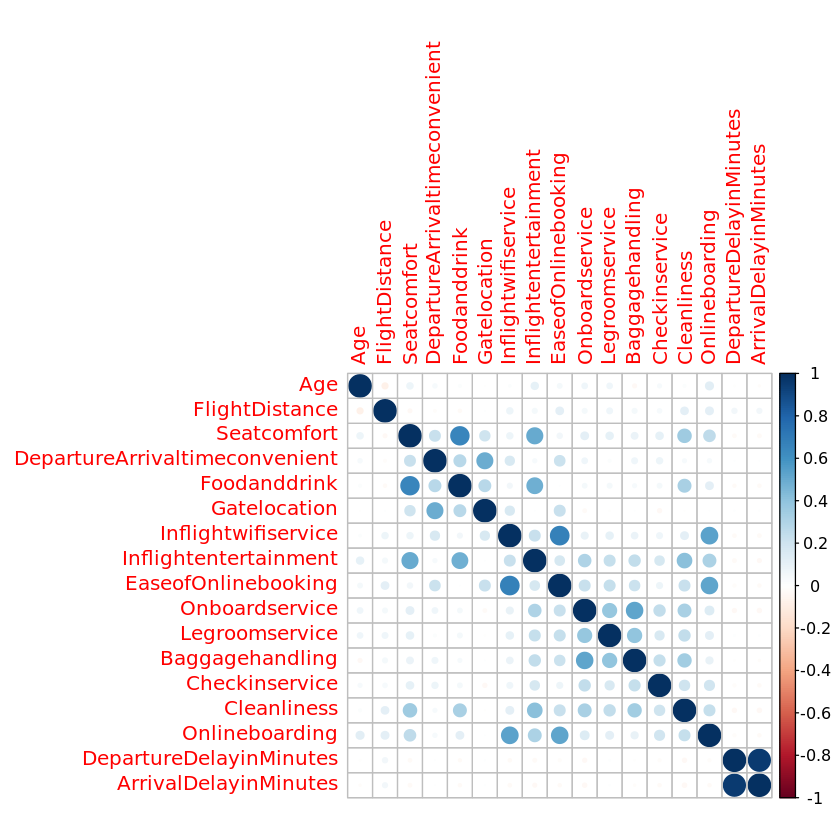

In [20]:
# Visualizing a correlation of numeric fields
library(corrplot)
correlations <- cor(dataset[,numeric_fields])
corrplot(cor(dataset[,numeric_fields]), method="circle")

## Visualzing a Box Plot of a fields containing statisfaction level

We can see that most of the fields containing statisfaction level have a good balance normal distribution but some still have a somem outliers and also positive and negative skewing such in Onboard service, Baggehandling, Checkinservice, Cleanliness

Also, The satisfaction scale is rating between 0-5 but in Baggagehandling the range of value dataset contains in that field is 1-5

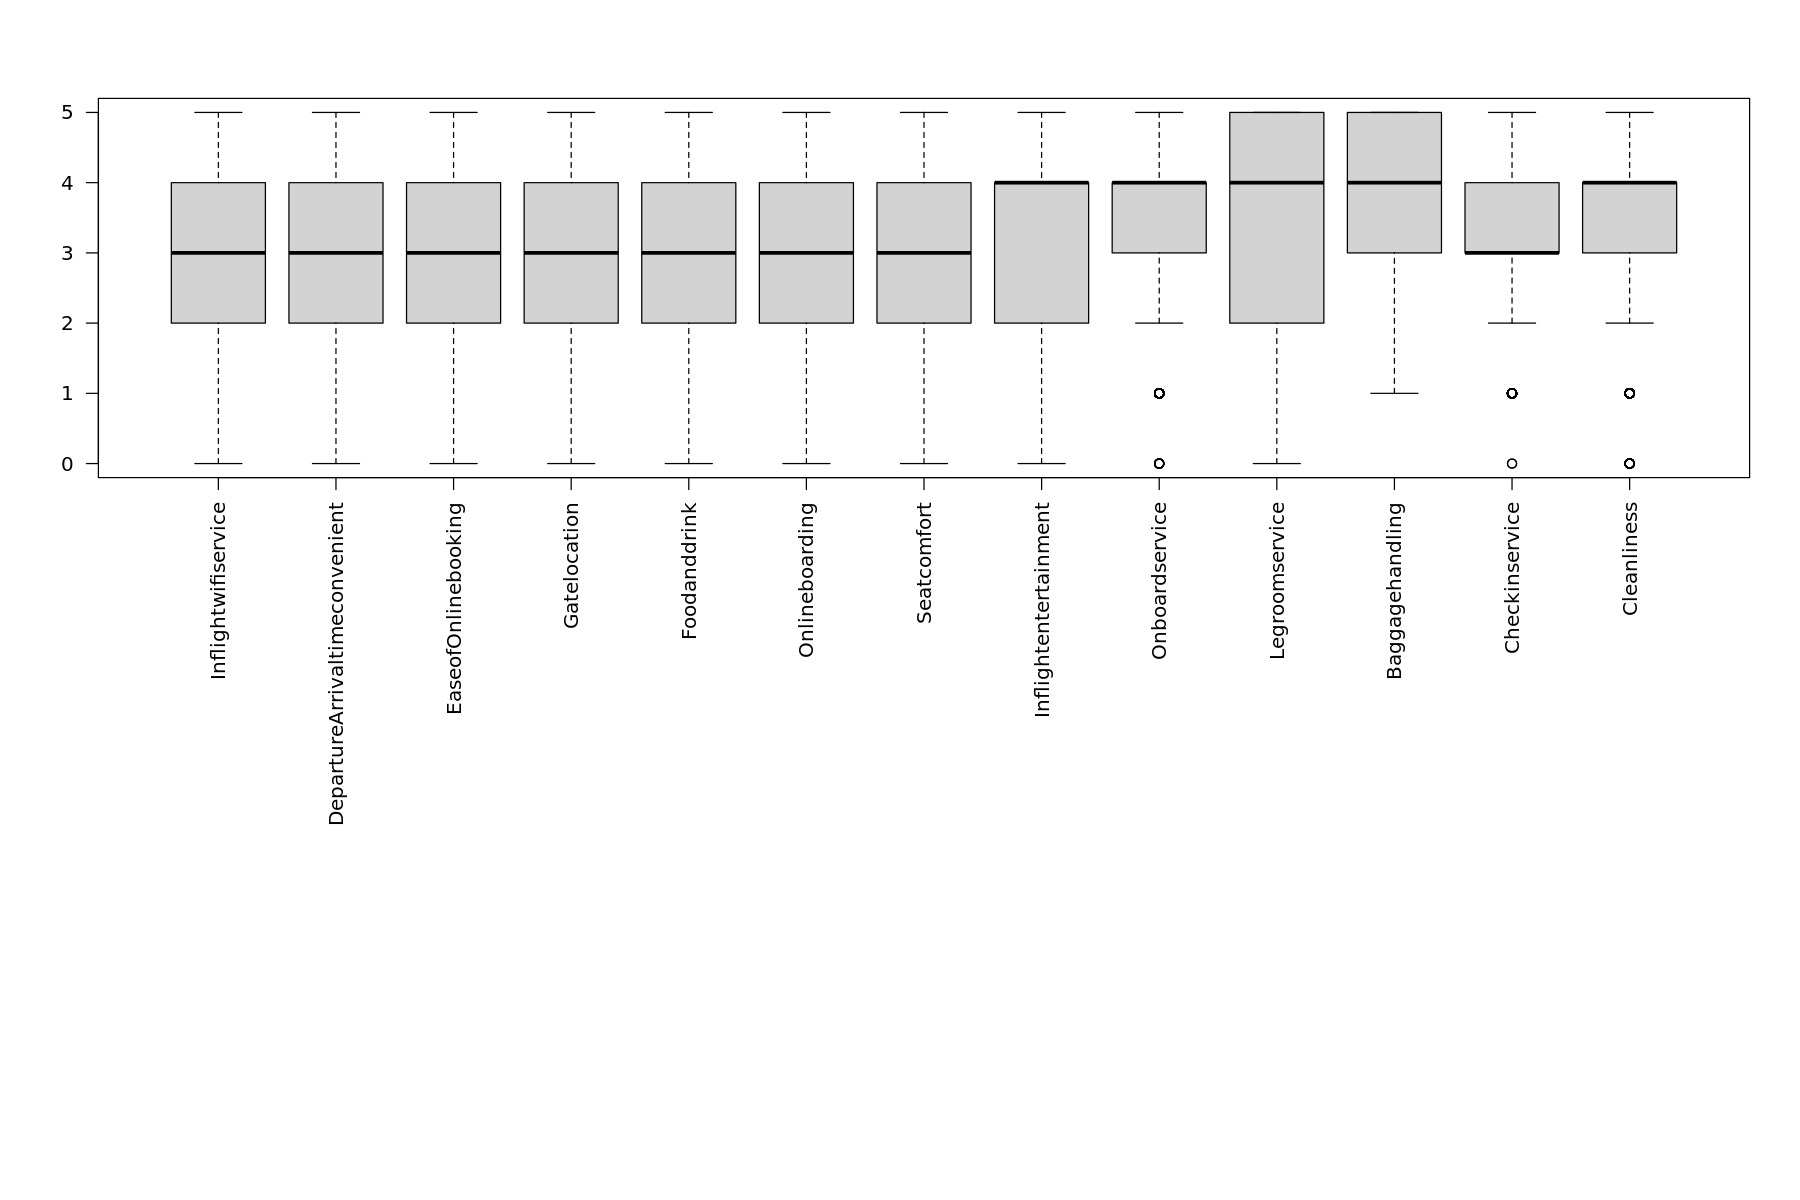

In [67]:
# Box plot
par(mfrow=c(2,1))
options(repr.plot.width = 15, repr.plot.height = 10)
# satisfaction data

satis_data<-dataset[,sat_cols]

boxplot(satis_data, las = 2)


## Visualizing a Historgram in in other numeric fields'


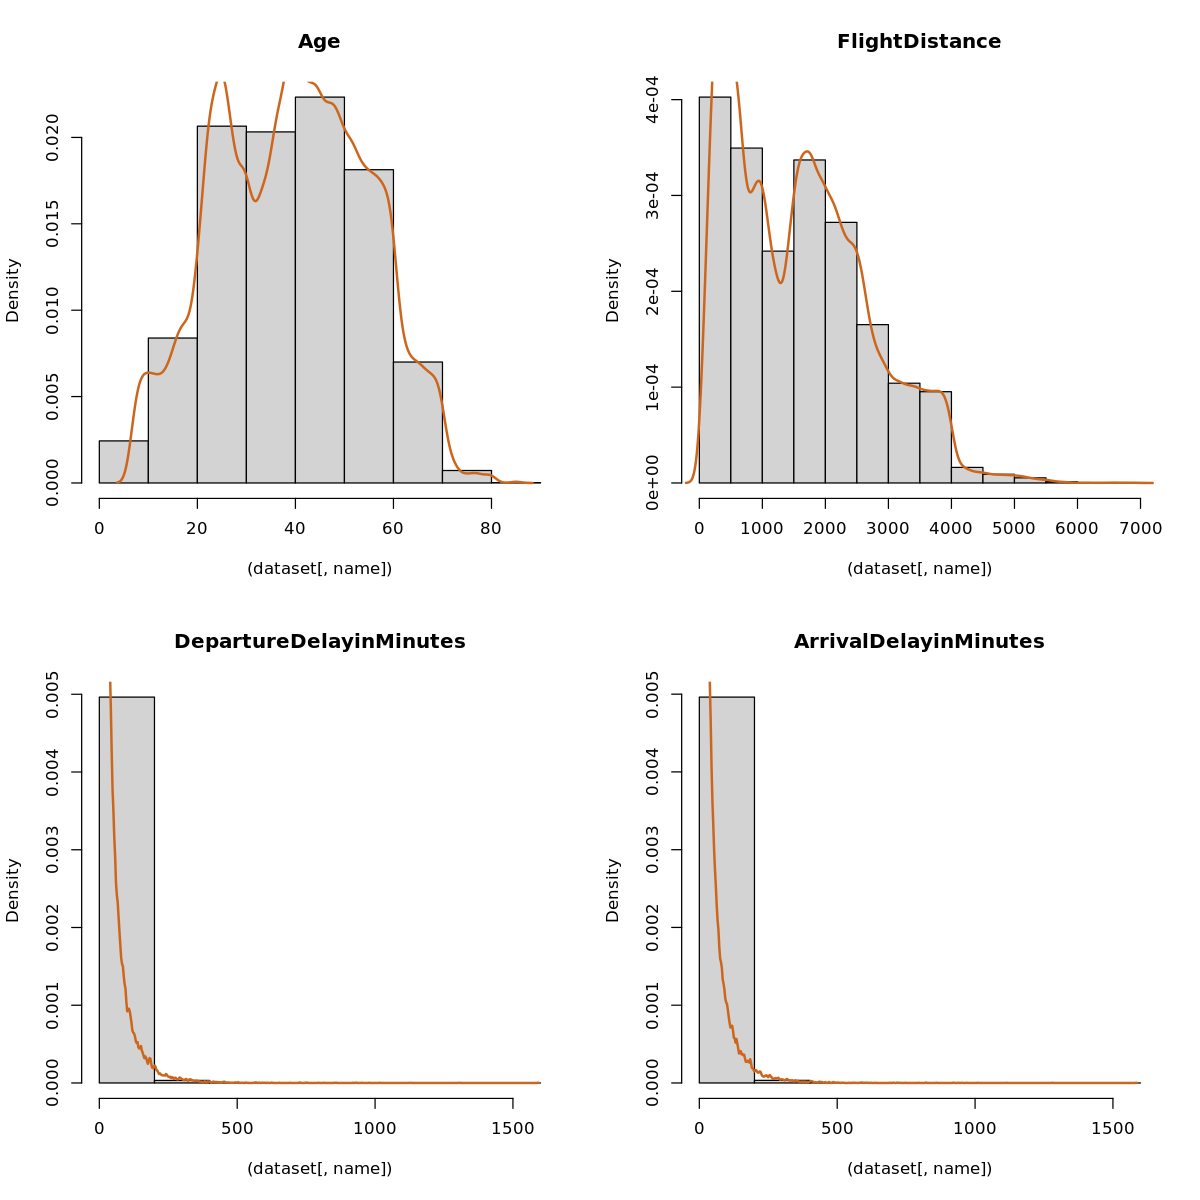

In [184]:
# Box plot
# satisfaction data

other_num<-dataset[,pure_numerical_val]

par(mfrow=c(2,2))
options(repr.plot.width = 10, repr.plot.height = 10)
for (name in pure_numerical_val){
    
    hist((dataset[,name]), main=name,breaks=10,prob=TRUE)
    lines(density(dataset[,name]),
      lwd = 2,
      col = "chocolate3")
}


# Visualize Symbolic Fields

## Use BarChart to display a distribution of each categories in each fields

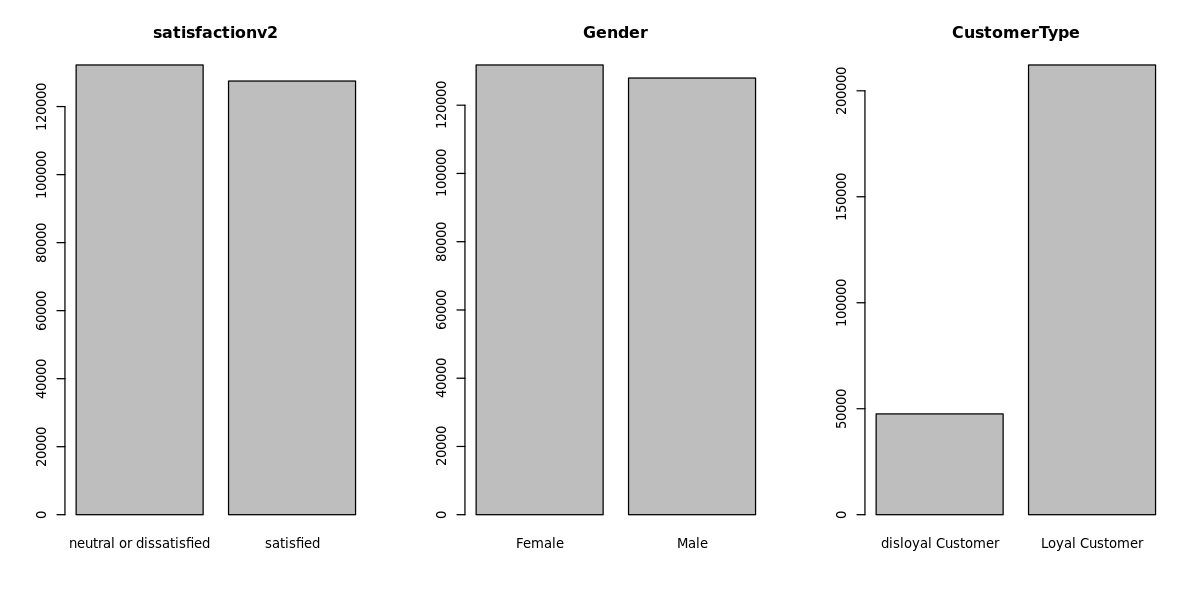

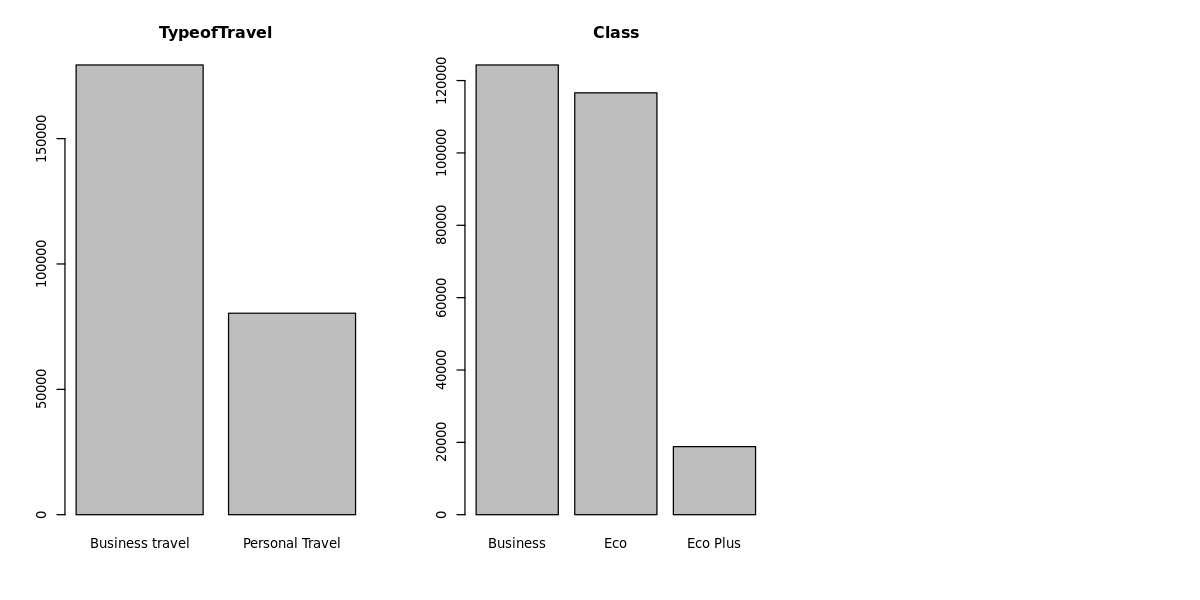

In [172]:
par(mfrow=c(1,3),pty = "m")
options(repr.plot.width = 10, repr.plot.height = 5)
for (name in symbolic_fields){
    counts <- table(dataset[,name])
    barplot(counts, main=name,)  
}


## Visualizing Relationship between a symbolic fields

                         Class
satisfactionv2            Business   Eco Eco Plus
  neutral or dissatisfied    37059 82702    12484
  satisfied                  87261 33916     6338

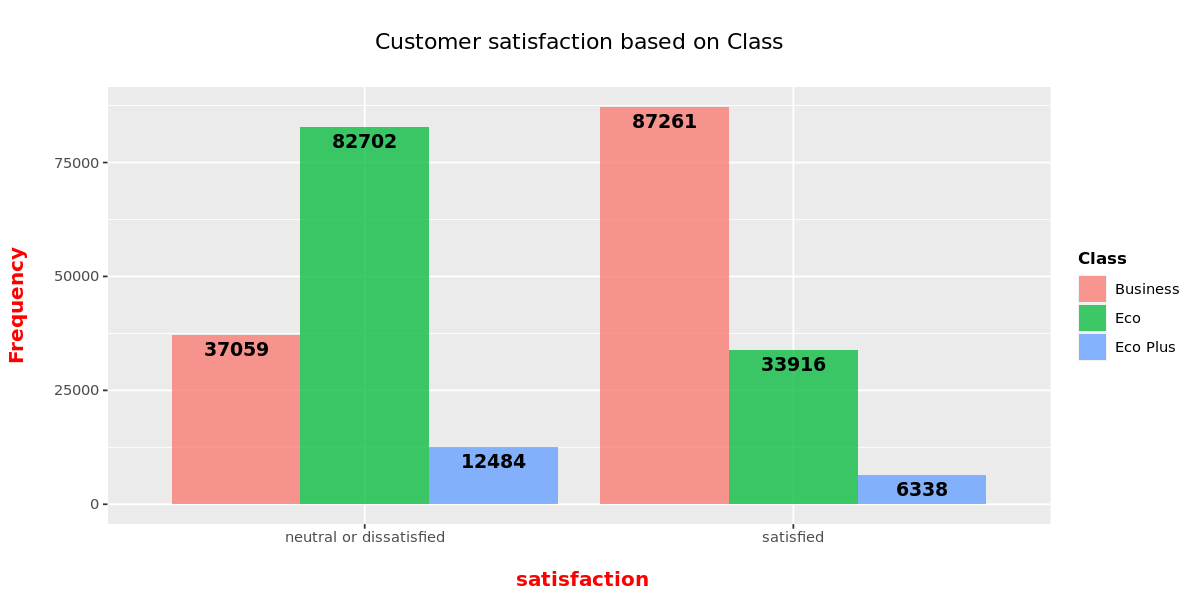

In [91]:
library("ggplot2")
sat_class = dataset[,c('satisfactionv2','Class')]
table(sat_class)
results <- data.frame(table(sat_class))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Class)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Class \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

                         Gender
satisfactionv2            Female  Male
  neutral or dissatisfied  60601 71644
  satisfied                71197 56318

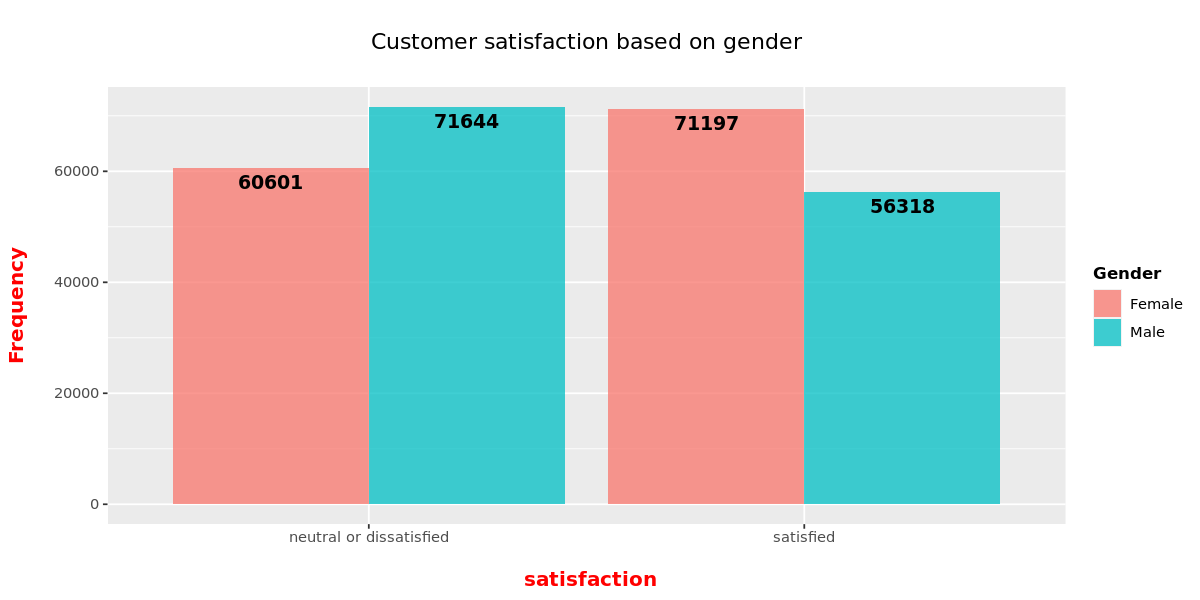

In [92]:
library("ggplot2")
sat_gender = dataset[,c('satisfactionv2','Gender')]
table(sat_gender)
results <- data.frame(table(sat_gender))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Gender)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on gender \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

                         CustomerType
satisfactionv2            disloyal Customer Loyal Customer
  neutral or dissatisfied             36160          96085
  satisfied                           11400         116115

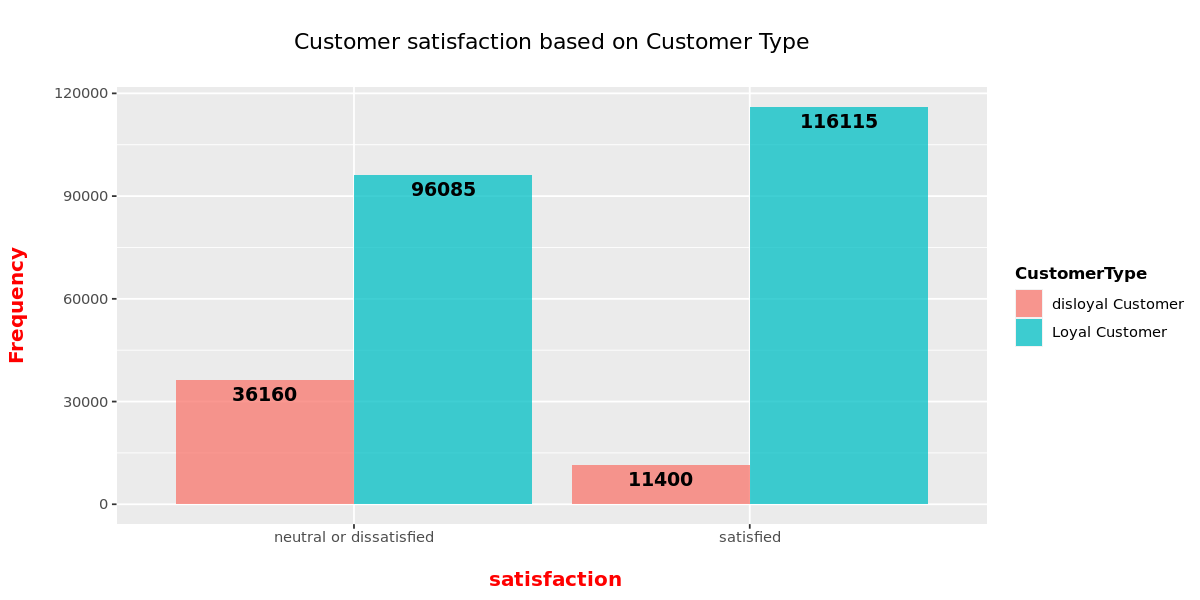

In [93]:

sat_type = dataset[,c('satisfactionv2','CustomerType')]
table(sat_type)
results <- data.frame(table(sat_type))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = CustomerType)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Customer Type \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

                         TypeofTravel
satisfactionv2            Business travel Personal Travel
  neutral or dissatisfied           74674           57571
  satisfied                        104712           22803

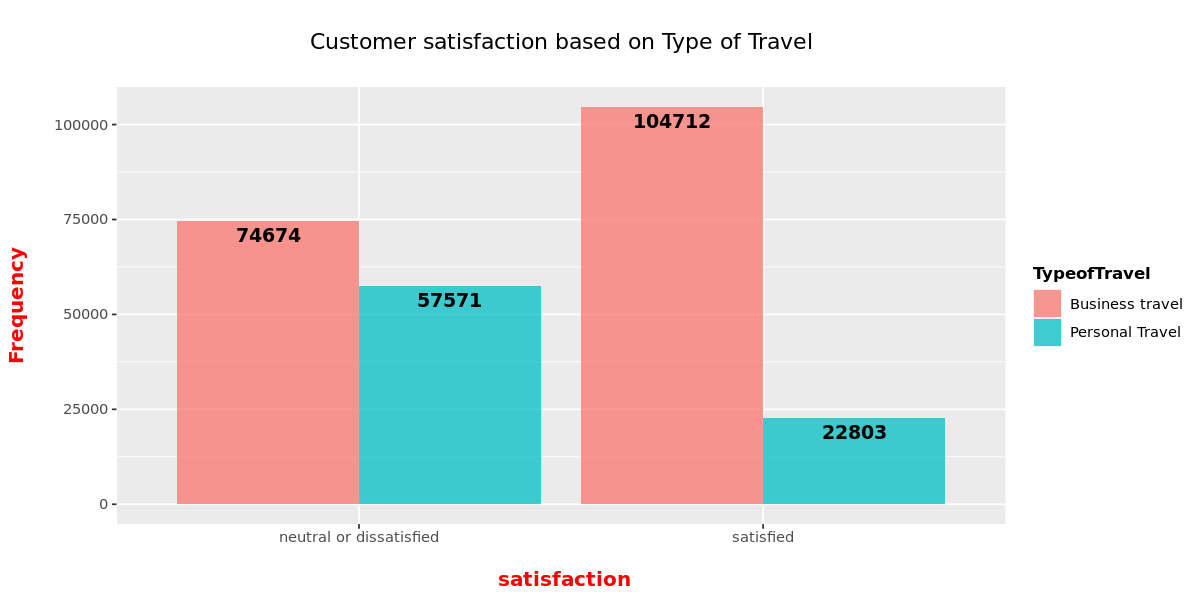

In [94]:
sat_type = dataset[,c('satisfactionv2','TypeofTravel')]
table(sat_type)
results <- data.frame(table(sat_type))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =TypeofTravel)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Type of Travel \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

## Visualizing Relationship between a Cusomter Satisfaction fields with fields containing Satisfaction scale

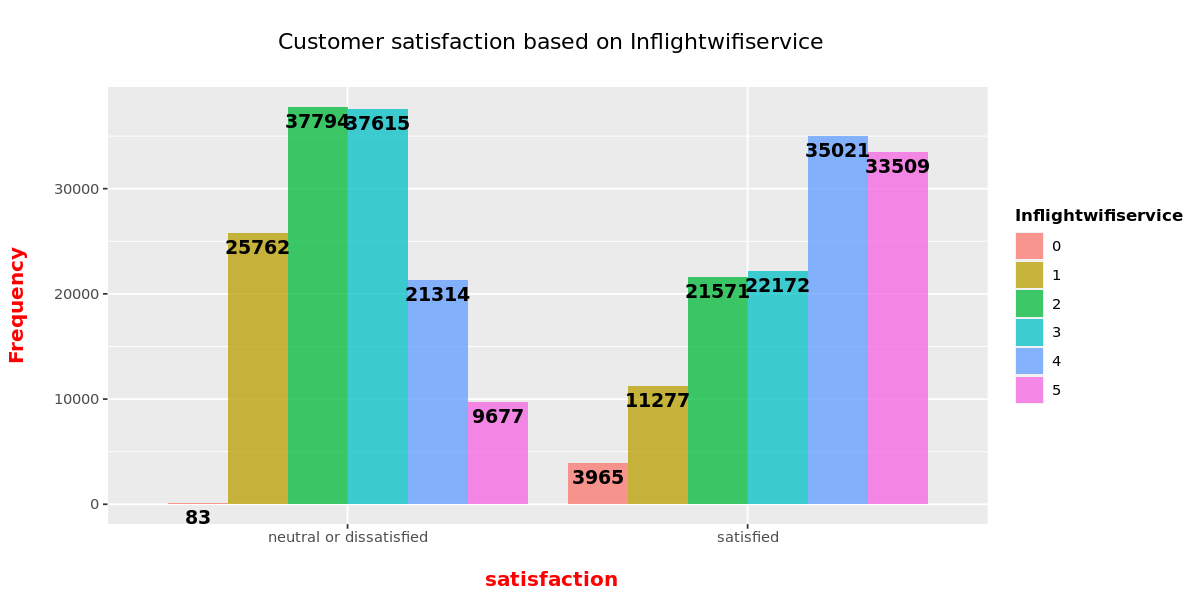

In [275]:

par(mfrow=c(2,4),pty = "m")
options(repr.plot.width = 10,epr.plot.height = 5)

temp_df<-cbind(dataset[,c('satisfactionv2','Inflightwifiservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =Inflightwifiservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Inflightwifiservice\n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

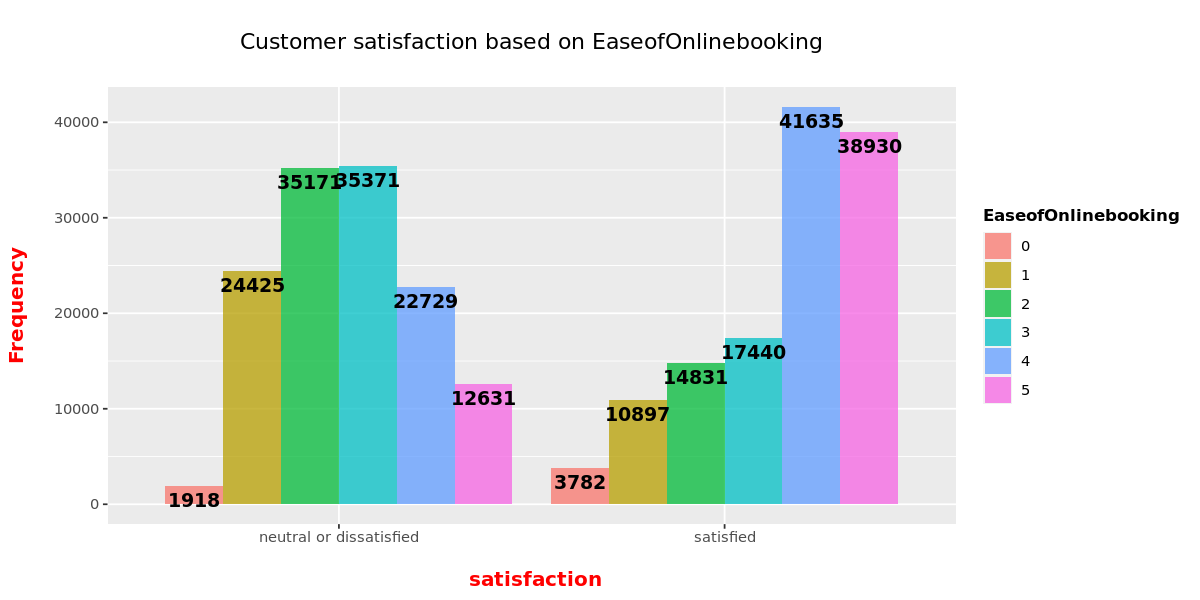

In [276]:
temp_df<-cbind(dataset[,c('satisfactionv2','EaseofOnlinebooking')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =EaseofOnlinebooking)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on EaseofOnlinebooking \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

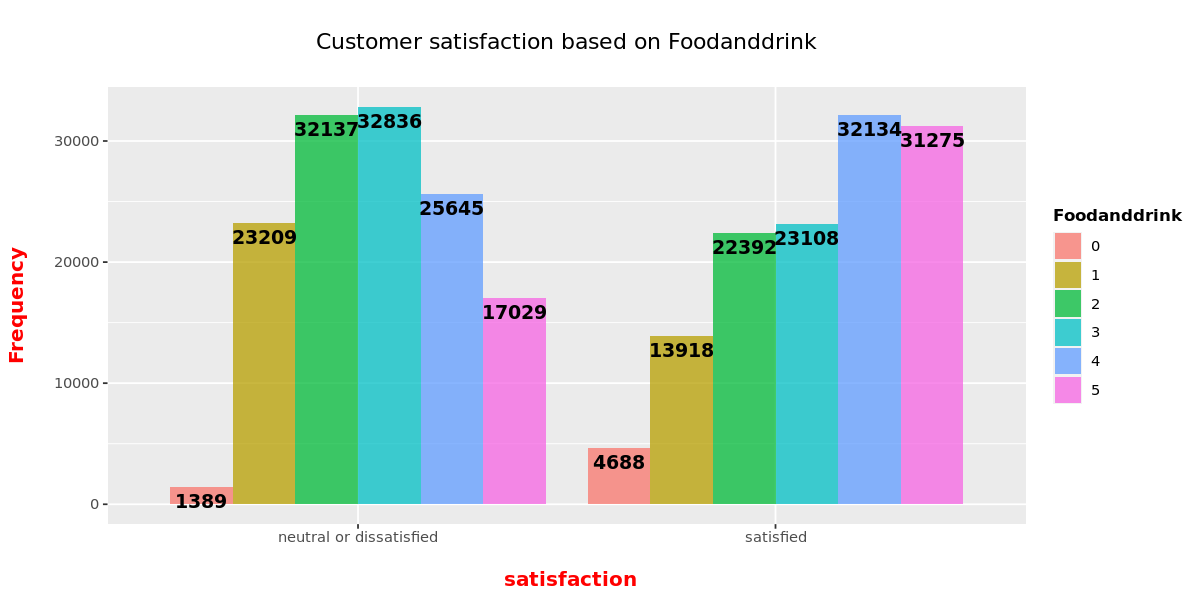

In [277]:
temp_df<-cbind(dataset[,c('satisfactionv2','Foodanddrink')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Foodanddrink)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Foodanddrink \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

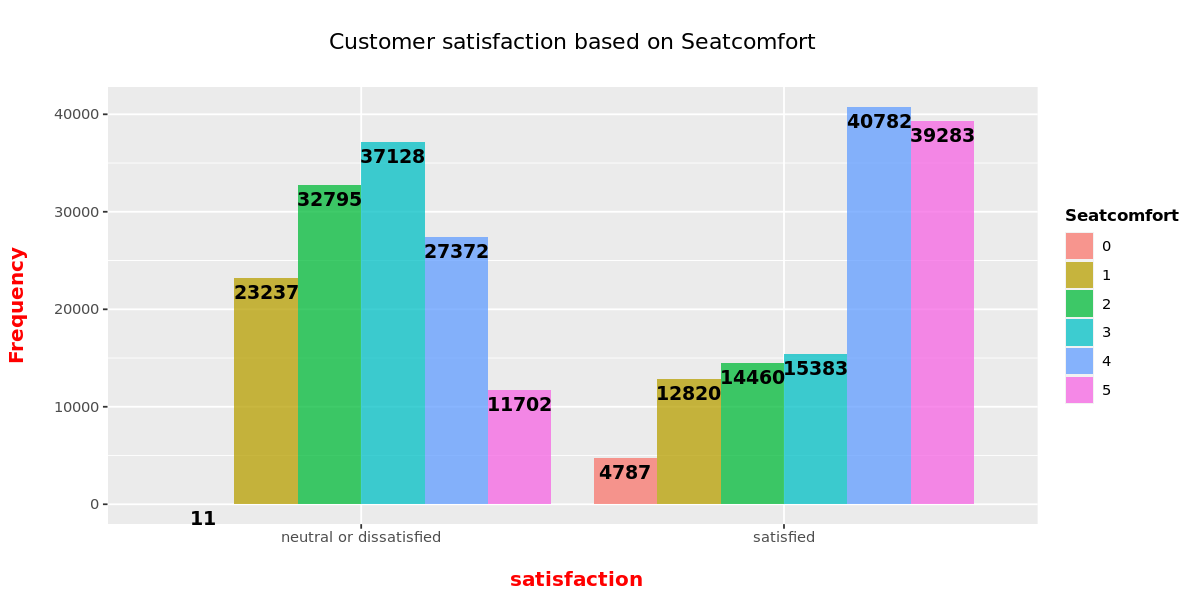

In [278]:
temp_df<-cbind(dataset[,c('satisfactionv2','Seatcomfort')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Seatcomfort)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Seatcomfort \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

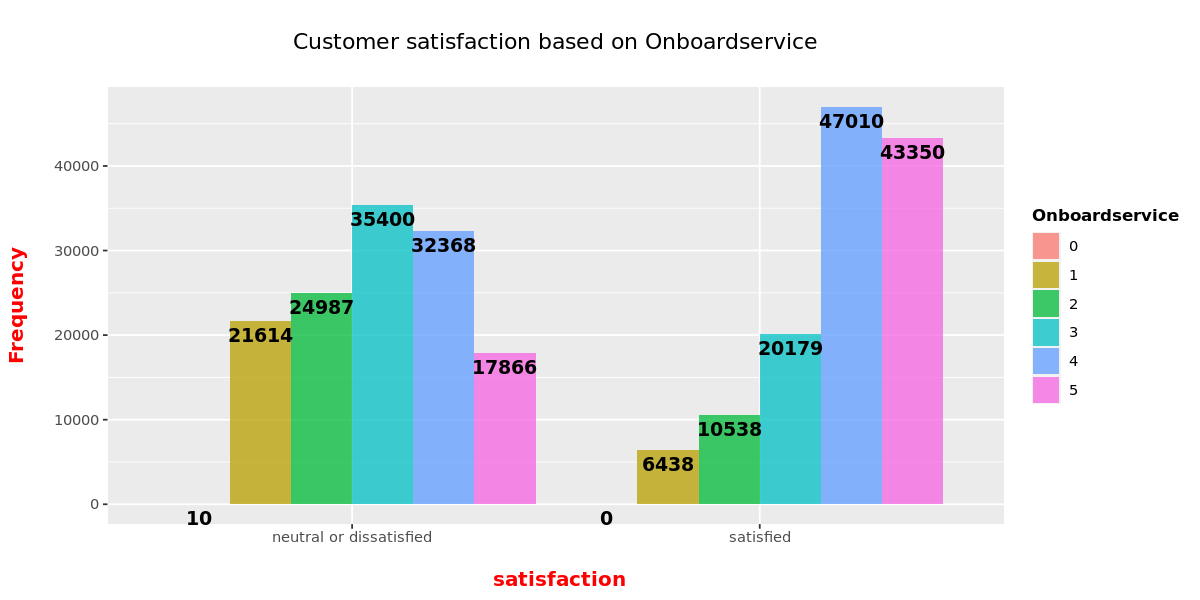

In [279]:
temp_df<-cbind(dataset[,c('satisfactionv2','Onboardservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Onboardservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Onboardservice \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

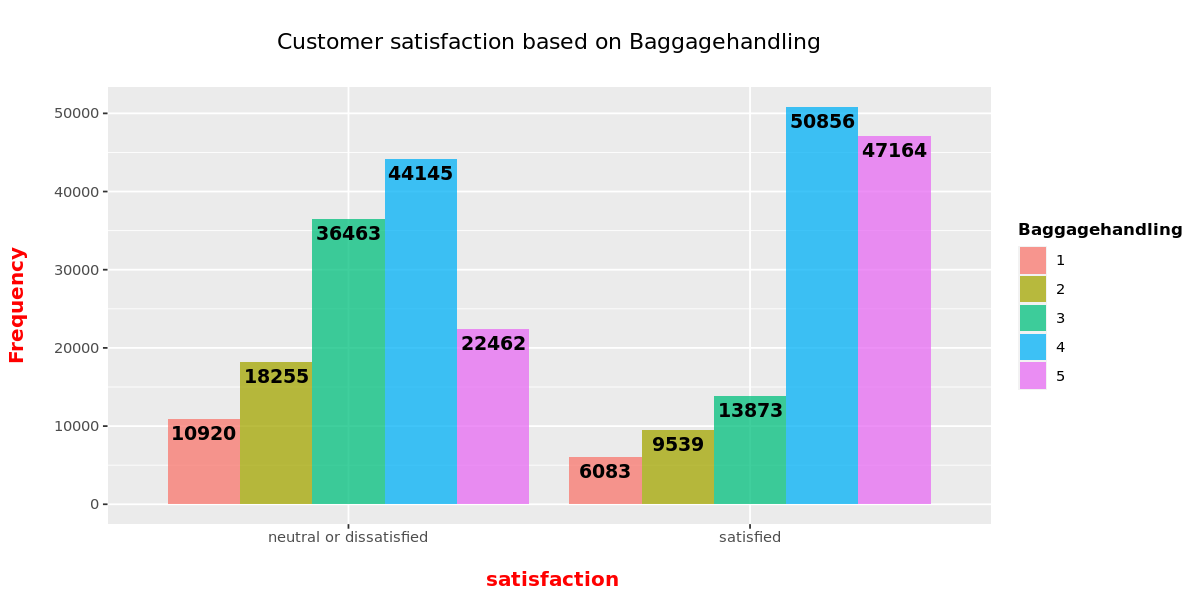

In [280]:
temp_df<-cbind(dataset[,c('satisfactionv2','Baggagehandling')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Baggagehandling)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Baggagehandling \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

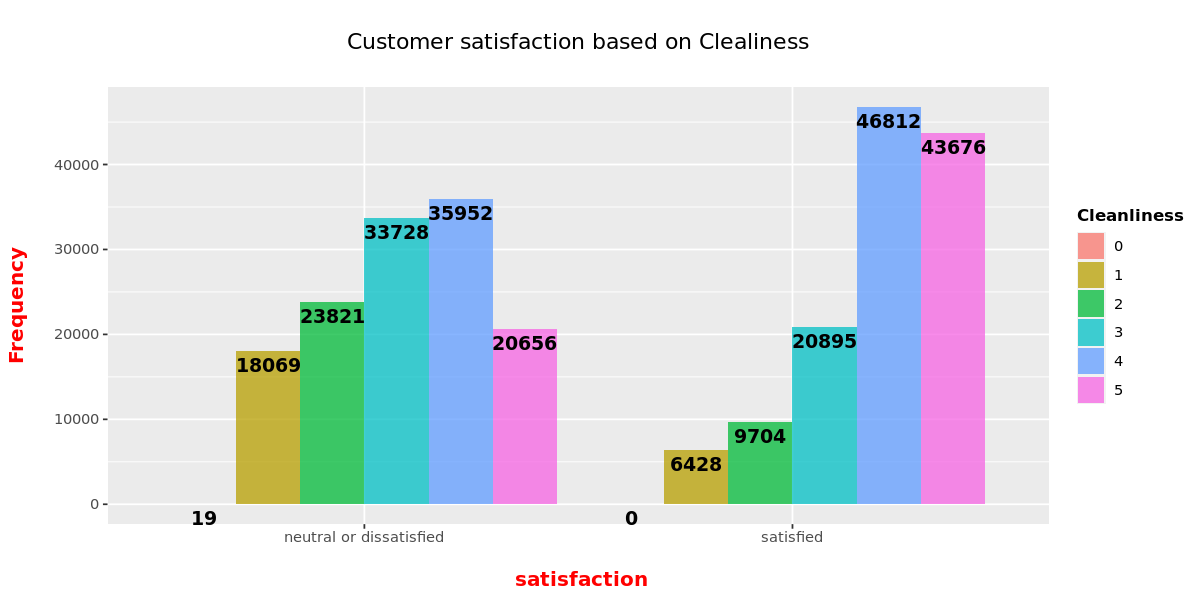

In [281]:
temp_df<-cbind(dataset[,c('satisfactionv2','Cleanliness')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Cleanliness)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Clealiness \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

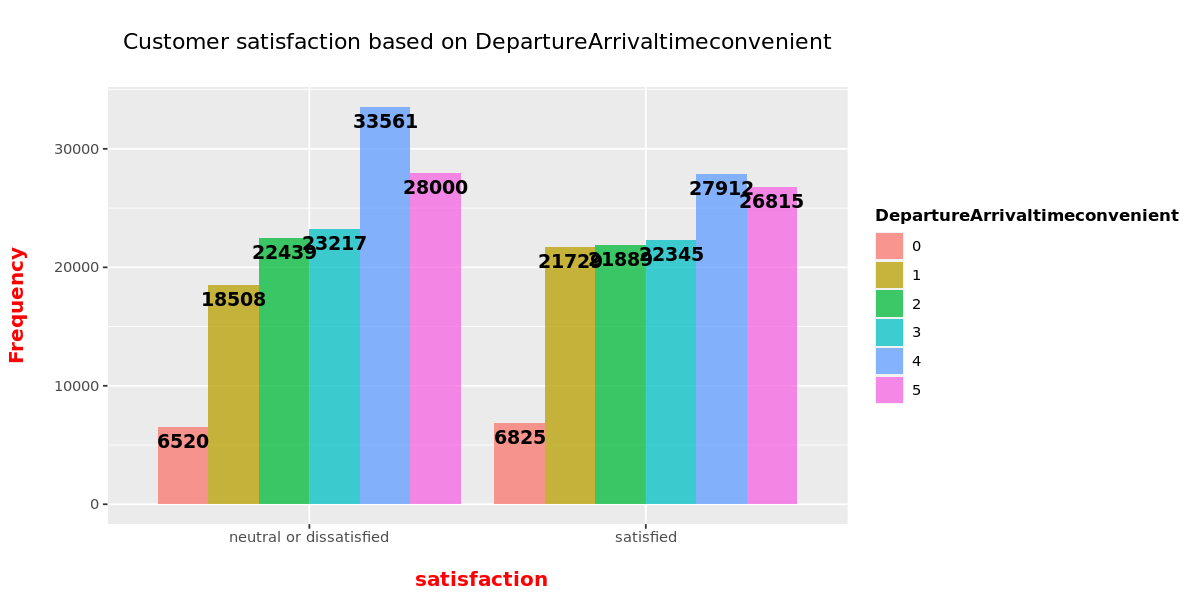

In [282]:
temp_df<-cbind(dataset[,c('satisfactionv2','DepartureArrivaltimeconvenient')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = DepartureArrivaltimeconvenient)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on DepartureArrivaltimeconvenient \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

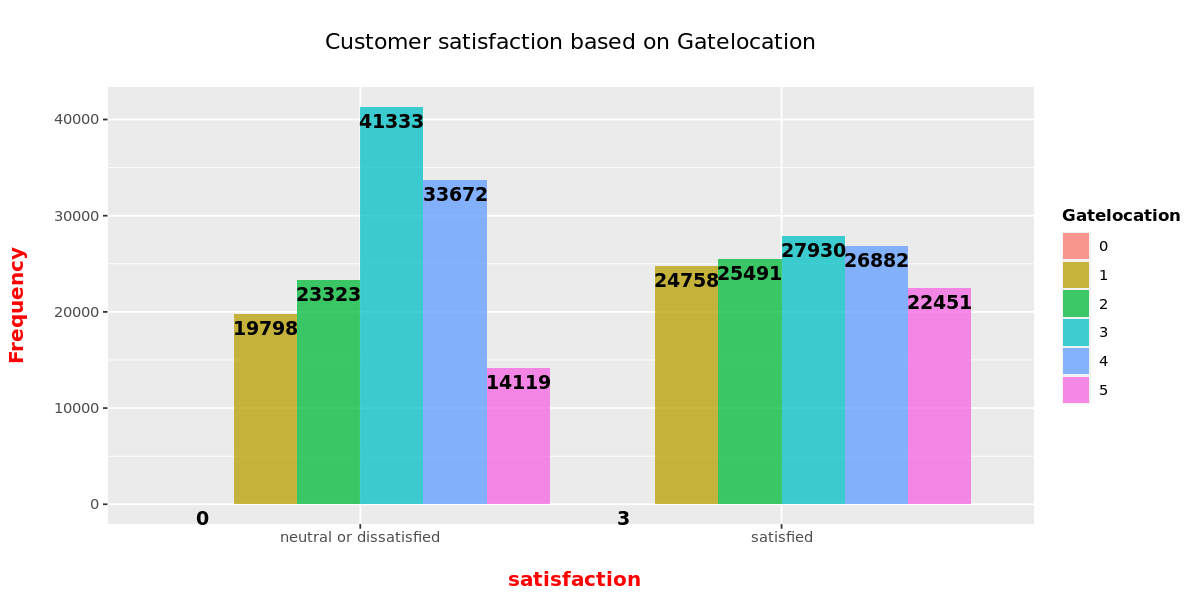

In [283]:
temp_df<-cbind(dataset[,c('satisfactionv2','Gatelocation')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Gatelocation)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Gatelocation \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

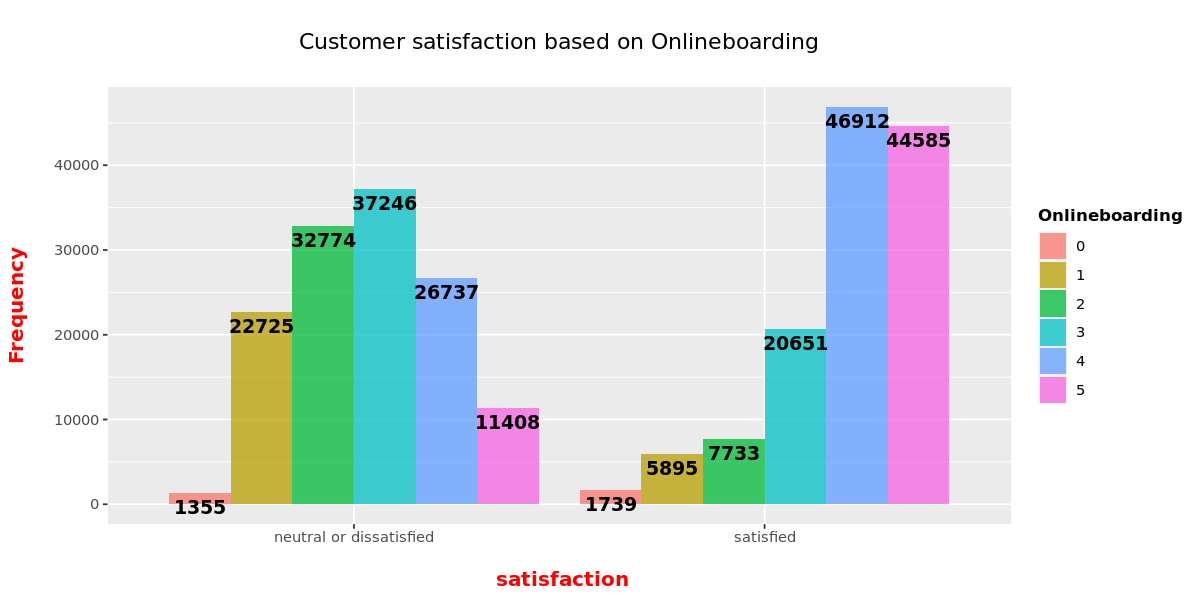

In [284]:
temp_df<-cbind(dataset[,c('satisfactionv2','Onlineboarding')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Onlineboarding)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Onlineboarding \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

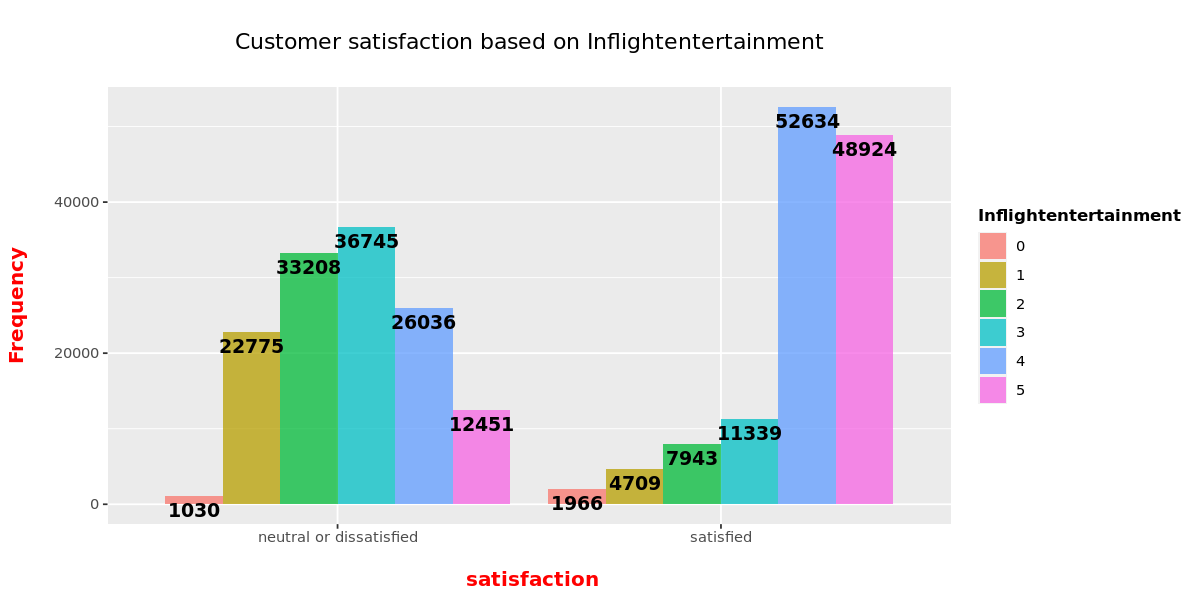

In [285]:
temp_df<-cbind(dataset[,c('satisfactionv2','Inflightentertainment')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =Inflightentertainment)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Inflightentertainment \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

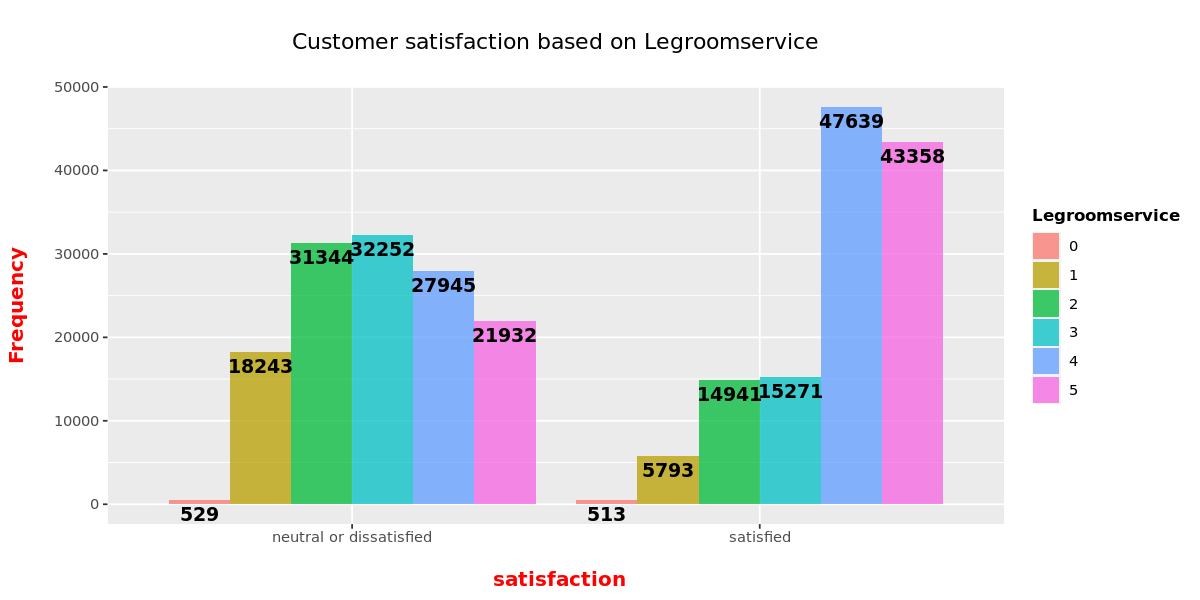

In [286]:
temp_df<-cbind(dataset[,c('satisfactionv2','Legroomservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Legroomservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Legroomservice \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

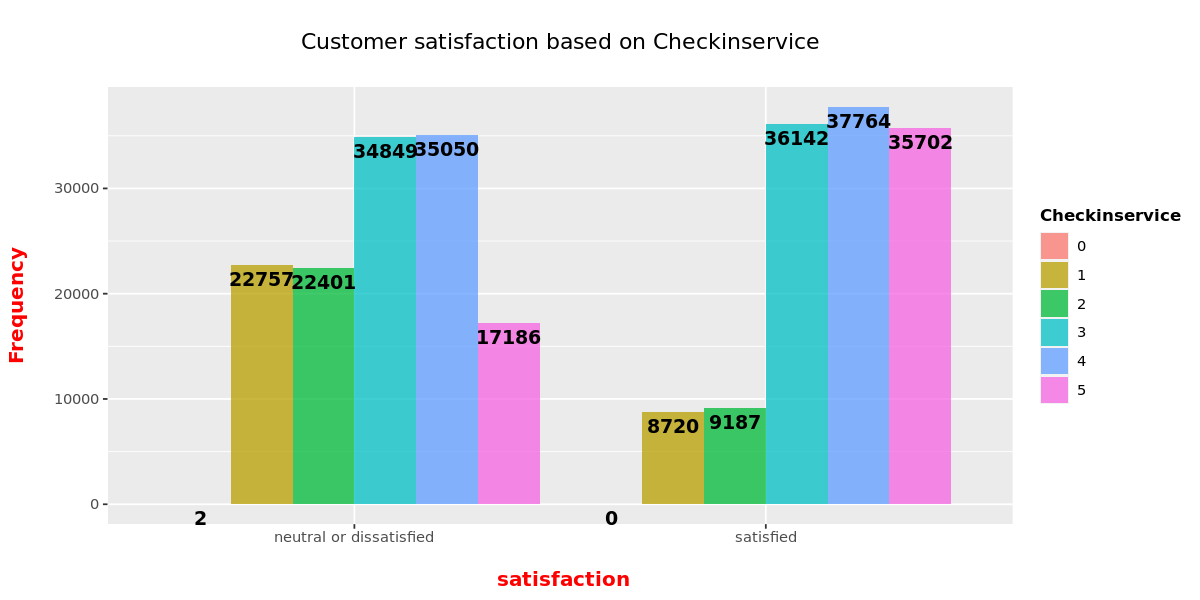

In [287]:
temp_df<-cbind(dataset[,c('satisfactionv2','Checkinservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Checkinservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Checkinservice \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

## Visualizing Relationship of a Customer Satisfation fields with maximum and mean of a scale

### Visualizing Relationship between a Cusomter Satisfaction fields with maximum occurance from all satisfation scale for each customer 

In [288]:
sat_data=dataset[,sat_cols]
# Calculate a maximum occurance from all satisfation scale for each customer  
max_occurance<-apply(sat_data,1,function(x) names(which.max(table(x))))

In [289]:
# create dataframe of max occurance scale
max_occur<-data.frame( max_occur = max_occurance)
sat=dataset[,c("satisfactionv2")]
# combine dataframe of max occurance and final statisfaction
max_sat<-cbind(max_occur,sat)

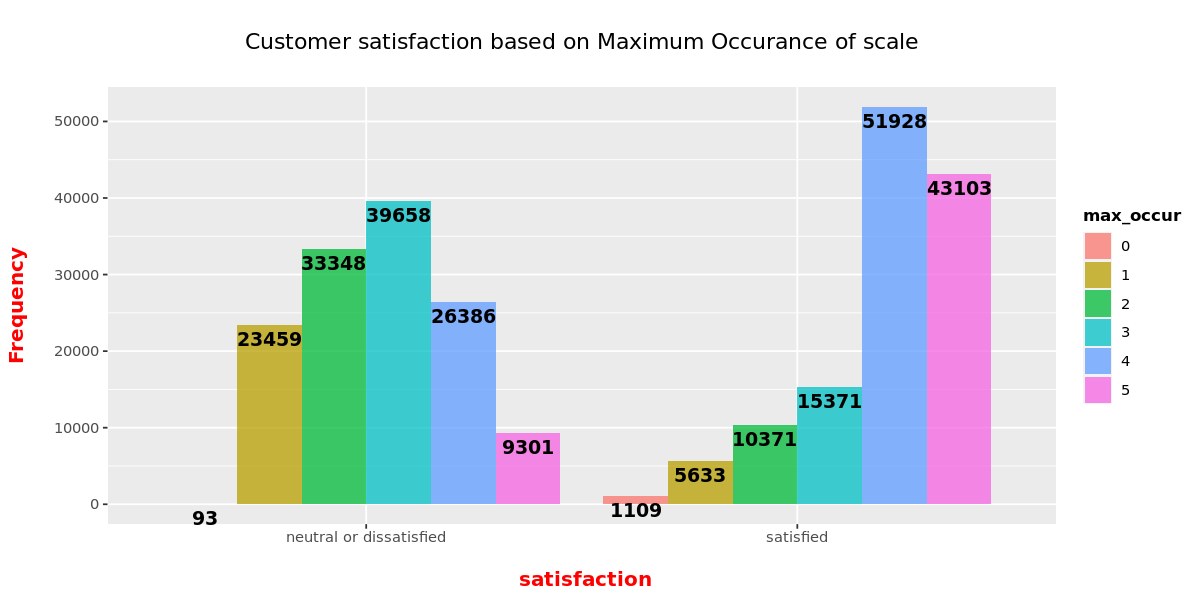

In [292]:
results <- data.frame(table(max_sat))
ggplot(data = results, aes(x = sat, y = Freq, fill =max_occur)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Maximum Occurance of scale \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

### Visualizing Relationship between a Cusomter Satisfaction fields with mean occurance from all satisfation scale for each customer 

In [162]:
mean_occurance<-round(rowMeans(sat_data))
# create dataframe of max occurance scale
mean_occur<-data.frame( mean_occur = mean_occurance)
sat=dataset[,c("satisfactionv2")]
# combine dataframe of max occurance and final statisfaction
mean_sat<-cbind(mean_occur,sat)
summary(mean_sat)

   mean_occur        sat           
 Min.   :1.000   Length:259760     
 1st Qu.:3.000   Class :character  
 Median :3.000   Mode  :character  
 Mean   :3.247                     
 3rd Qu.:4.000                     
 Max.   :5.000                     

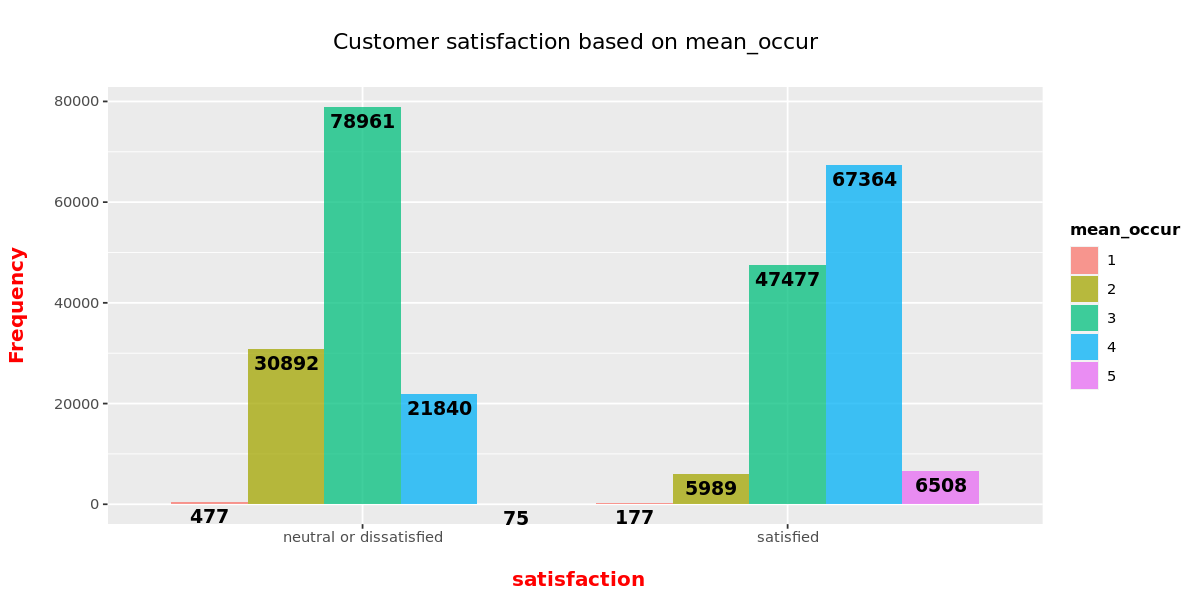

In [164]:
results <- data.frame(table(mean_sat))
ggplot(data = results, aes(x = sat, y = Freq, fill =mean_occur)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on mean_occur \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))